In [1]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import datetime
import gc
gc.collect()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
def get_first_batch(path):
    parquet_file = pq.ParquetFile(path)
    for batch in parquet_file.iter_batches():
        return batch.to_pandas()
def get_all_batches(path):
    parquet_file = pq.ParquetFile(path)
    return pd.concat([batch.to_pandas() for batch in parquet_file.iter_batches()])

In [3]:
ARTICLE_DATA_PATH = "data/Drive Daten/students_articles_enriched_1.parquet.gzip"
PAGEVIEW_DATA_PATH = "data/Drive Daten/students_pageviews_2021-01-02.parquet.gzip"

In [4]:
import glob
import os

In [5]:
article_data = get_all_batches(ARTICLE_DATA_PATH)


pageview_data = pd.concat([get_first_batch(f) for f in glob.glob(f"{os.getcwd()}/data/Drive Daten/students_pageviews*.gzip")][:50])

pageview_data = get_first_batch(PAGEVIEW_DATA_PATH)

In [6]:
# Remove new lines from full text for ARI
article_data["article_full_text"] = article_data["article_full_text"].apply(lambda x: x.replace("\n", " "))

In [7]:
# Calculate text complexity using rounded ARI
def ARI(text):
    score = 0.0 
    if len(text) > 0:
        score = round(4.71 * (len(text) / len(text.split()) ) +  0.5 * ( len(text.split()) / len(text.split('.'))) - 21.43)
        return score if score > 0 else 0
article_data["ARI"] = article_data["article_full_text"].apply(lambda x:ARI(x))

In [8]:
# Get all columns
article_data.columns

Index(['publisher_id', 'article_drive_id', 'article_header', 'article_teaser',
       'article_full_text', 'is_plus_article', 'is_dpa', 'published_at_local',
       'modified_at_local', 'pad_pleasure', 'pad_arousal', 'pad_dominance',
       'preview_pad_pleasure', 'preview_pad_arousal', 'preview_pad_dominance',
       'emo_aerger', 'emo_erwarten', 'emo_ekel', 'emo_furcht', 'emo_freude',
       'emo_traurigkeit', 'emo_ueberraschung', 'emo_vertrauen',
       'article_preview_emotion', 'preview_emo_aerger', 'preview_emo_erwarten',
       'preview_emo_ekel', 'preview_emo_furcht', 'preview_emo_freude',
       'preview_emo_traurigkeit', 'preview_emo_ueberraschung',
       'preview_emo_vertrauen', 'article_header_contains_quote',
       'article_header_contains_question',
       'article_header_contains_doppelpunkt',
       'article_header_contains_pronoun_writer',
       'article_header_contains_pronoun_reader',
       'article_preview_contains_quote', 'article_preview_contains_question',
  

In [9]:
article_data.head()

,publisher_id,article_drive_id,article_header,article_teaser,article_full_text,is_plus_article,is_dpa,published_at_local,modified_at_local,pad_pleasure,pad_arousal,pad_dominance,preview_pad_pleasure,preview_pad_arousal,preview_pad_dominance,emo_aerger,emo_erwarten,emo_ekel,emo_furcht,emo_freude,emo_traurigkeit,emo_ueberraschung,emo_vertrauen,article_preview_emotion,preview_emo_aerger,preview_emo_erwarten,preview_emo_ekel,preview_emo_furcht,preview_emo_freude,preview_emo_traurigkeit,preview_emo_ueberraschung,preview_emo_vertrauen,article_header_contains_quote,article_header_contains_question,article_header_contains_doppelpunkt,article_header_contains_pronoun_writer,article_header_contains_pronoun_reader,article_preview_contains_quote,article_preview_contains_question,article_preview_contains_doppelpunkt,article_preview_contains_pronoun_writer,article_preview_contains_pronoun_reader,topic,locality,newstype,genre,ARI
0,publisher_4,381b734a433f519e37c4033a38756999,Entlastung für evangelische Kirchengemeinde: U...,Das Ende der Doppelbelastung von Silke Niemeye...,Entlastung für evangelische Kirchengemeinde: U...,False,False,2018-10-15 18:42:46,2018-10-15 18:42:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'emo_aerger': None, 'emo_erwarten': None, 'em...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,True,False,False,None,None,None,None,18
1,publisher_7,f7f09d3abfe0a154f7e2a0a70a2ab691,Fahrsportler beenden lange Durststrecke,2010 hatten die Fahrsportler des RFV Gustav Ra...,RFV Gustav Rau Westbevern Fahrsportler beende...,False,False,2019-10-22 06:00:00,2019-10-23 14:40:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'emo_aerger': None, 'emo_erwarten': None, 'em...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,None,None,None,None,17
2,publisher_4,0f5cebb0eedb435bf2778145f4defe0f,Firma Umwelt Control Labor erweitert ihr Verwa...,Die UCL Umwelt Control Labor GmbH baut. Sie er...,Firma Umwelt Control Labor erweitert ihr Verwa...,False,False,2018-11-07 12:45:00,2018-11-07 12:45:00,NaN,NaN,NaN,0.380031,-0.315349,0.49541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'emo_aerger': 0.0, 'emo_erwarten': 0.10147517...",0.000000,0.101475,0.0,0.00000,0.240731,0.000000,0.000000,0.034126,False,False,False,False,False,False,False,False,False,True,Wirtschaft: Verbraucher,Lokal (Lokalausgabe),News to Use,Nachrichten/Bericht,21
3,publisher_2,2b4dec7230a153afcdaf582ffa3aed9f,Farbenfroher Erntedankumzug durch Niederwihl,Bei bestem Wetter warfen sich die Teilnehmer i...,Farbenfroher Erntedankumzug durch Niederwihl...,False,False,2018-10-08 00:00:00,2018-10-08 01:03:17,NaN,NaN,NaN,0.502255,-0.125115,0.24623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'emo_aerger': -0.21557336715588193, 'emo_erwa...",-0.215573,0.029477,0.0,-0.26582,0.414121,-0.368744,-0.234213,0.035230,False,False,False,False,False,False,False,False,False,False,Vermischtes: Soziales,Lokal (Lokalausgabe),News to Entertain,Nachrichten/Bericht,18
4,publisher_7,1e0ca4c405e07aae24d89d6fa2c73eaa,,Bei einer Verkehrskontrolle haben Polizeibeamt...,Fahren ohne Führerschein Bei einer Verkehrs...,False,False,2018-07-15 17:00:00,2018-07-15 17:04:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'emo_aerger': None, 'emo_erwarten': None, 'em...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,Justiz/Kriminalität,Lokal (Lokalausgabe),None,None,18


In [10]:
# Remove all plain text columns
PLAIN_TEXT_COLUMNS = ["article_header", "article_teaser", "article_full_text", "article_preview_emotion"]
article_data.drop(columns=PLAIN_TEXT_COLUMNS, inplace=True)

In [11]:
article_data.head()

,publisher_id,article_drive_id,is_plus_article,is_dpa,published_at_local,modified_at_local,pad_pleasure,pad_arousal,pad_dominance,preview_pad_pleasure,preview_pad_arousal,preview_pad_dominance,emo_aerger,emo_erwarten,emo_ekel,emo_furcht,emo_freude,emo_traurigkeit,emo_ueberraschung,emo_vertrauen,preview_emo_aerger,preview_emo_erwarten,preview_emo_ekel,preview_emo_furcht,preview_emo_freude,preview_emo_traurigkeit,preview_emo_ueberraschung,preview_emo_vertrauen,article_header_contains_quote,article_header_contains_question,article_header_contains_doppelpunkt,article_header_contains_pronoun_writer,article_header_contains_pronoun_reader,article_preview_contains_quote,article_preview_contains_question,article_preview_contains_doppelpunkt,article_preview_contains_pronoun_writer,article_preview_contains_pronoun_reader,topic,locality,newstype,genre,ARI
0,publisher_4,381b734a433f519e37c4033a38756999,False,False,2018-10-15 18:42:46,2018-10-15 18:42:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,True,False,False,None,None,None,None,18
1,publisher_7,f7f09d3abfe0a154f7e2a0a70a2ab691,False,False,2019-10-22 06:00:00,2019-10-23 14:40:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,None,None,None,None,17
2,publisher_4,0f5cebb0eedb435bf2778145f4defe0f,False,False,2018-11-07 12:45:00,2018-11-07 12:45:00,NaN,NaN,NaN,0.380031,-0.315349,0.49541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.101475,0.0,0.00000,0.240731,0.000000,0.000000,0.034126,False,False,False,False,False,False,False,False,False,True,Wirtschaft: Verbraucher,Lokal (Lokalausgabe),News to Use,Nachrichten/Bericht,21
3,publisher_2,2b4dec7230a153afcdaf582ffa3aed9f,False,False,2018-10-08 00:00:00,2018-10-08 01:03:17,NaN,NaN,NaN,0.502255,-0.125115,0.24623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.215573,0.029477,0.0,-0.26582,0.414121,-0.368744,-0.234213,0.035230,False,False,False,False,False,False,False,False,False,False,Vermischtes: Soziales,Lokal (Lokalausgabe),News to Entertain,Nachrichten/Bericht,18
4,publisher_7,1e0ca4c405e07aae24d89d6fa2c73eaa,False,False,2018-07-15 17:00:00,2018-07-15 17:04:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,Justiz/Kriminalität,Lokal (Lokalausgabe),None,None,18


In [12]:
# Fill missing data
article_data[["topic", "locality", "newstype", "genre"]] = article_data[["topic", "locality", "newstype", "genre"]].fillna("")

EMO_COLUMNS = ["pad_pleasure", "pad_arousal", "pad_dominance", "preview_pad_pleasure", "preview_pad_arousal", "preview_pad_dominance", "emo_aerger", "emo_erwarten", "emo_ekel", "emo_furcht", "emo_freude", "emo_traurigkeit", "emo_ueberraschung", "emo_vertrauen", "preview_emo_aerger", "preview_emo_erwarten", "preview_emo_ekel", "preview_emo_furcht", "preview_emo_freude", "preview_emo_traurigkeit", "preview_emo_ueberraschung", "preview_emo_vertrauen"]

article_data[EMO_COLUMNS] = article_data[EMO_COLUMNS].fillna(0)

In [13]:
article_data.head()

,publisher_id,article_drive_id,is_plus_article,is_dpa,published_at_local,modified_at_local,pad_pleasure,pad_arousal,pad_dominance,preview_pad_pleasure,preview_pad_arousal,preview_pad_dominance,emo_aerger,emo_erwarten,emo_ekel,emo_furcht,emo_freude,emo_traurigkeit,emo_ueberraschung,emo_vertrauen,preview_emo_aerger,preview_emo_erwarten,preview_emo_ekel,preview_emo_furcht,preview_emo_freude,preview_emo_traurigkeit,preview_emo_ueberraschung,preview_emo_vertrauen,article_header_contains_quote,article_header_contains_question,article_header_contains_doppelpunkt,article_header_contains_pronoun_writer,article_header_contains_pronoun_reader,article_preview_contains_quote,article_preview_contains_question,article_preview_contains_doppelpunkt,article_preview_contains_pronoun_writer,article_preview_contains_pronoun_reader,topic,locality,newstype,genre,ARI
0,publisher_4,381b734a433f519e37c4033a38756999,False,False,2018-10-15 18:42:46,2018-10-15 18:42:46,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,False,False,True,False,False,False,False,True,False,False,,,,,18
1,publisher_7,f7f09d3abfe0a154f7e2a0a70a2ab691,False,False,2019-10-22 06:00:00,2019-10-23 14:40:42,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,,,,,17
2,publisher_4,0f5cebb0eedb435bf2778145f4defe0f,False,False,2018-11-07 12:45:00,2018-11-07 12:45:00,0.0,0.0,0.0,0.380031,-0.315349,0.49541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.101475,0.0,0.00000,0.240731,0.000000,0.000000,0.034126,False,False,False,False,False,False,False,False,False,True,Wirtschaft: Verbraucher,Lokal (Lokalausgabe),News to Use,Nachrichten/Bericht,21
3,publisher_2,2b4dec7230a153afcdaf582ffa3aed9f,False,False,2018-10-08 00:00:00,2018-10-08 01:03:17,0.0,0.0,0.0,0.502255,-0.125115,0.24623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.215573,0.029477,0.0,-0.26582,0.414121,-0.368744,-0.234213,0.035230,False,False,False,False,False,False,False,False,False,False,Vermischtes: Soziales,Lokal (Lokalausgabe),News to Entertain,Nachrichten/Bericht,18
4,publisher_7,1e0ca4c405e07aae24d89d6fa2c73eaa,False,False,2018-07-15 17:00:00,2018-07-15 17:04:08,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,Justiz/Kriminalität,Lokal (Lokalausgabe),,,18


In [14]:
pageview_data.head()

,user_id,publisher_id,portal_id,time_engaged_in_s,is_paywall,article_drive_id,page_view_start_local
0,466fb0d0-3df6-4bae-89e3-3af6406802e2,publisher_1,portal_2,0,True,0004736adc2a906848990c294eb0fb56,2021-01-02 15:45:57.032
1,4aa1b987-9f18-44bb-9d6d-0c8ffee31fb2,publisher_10,portal_31,0,True,002f151111870d37c70f10c4ba4eb233,2021-01-02 17:20:50.848
2,d4702b2d-2c11-45c2-b5c6-fa3ce639a1d2,publisher_9,portal_17,0,False,003b778fef8a2e77f26b3da33df56f27,2021-01-02 13:18:36.621
3,d4702b2d-2c11-45c2-b5c6-fa3ce639a1d2,publisher_9,portal_17,0,False,003b778fef8a2e77f26b3da33df56f27,2021-01-02 17:15:49.658
4,c94e805e-fcb8-465b-b620-bc19122954f8,publisher_10,portal_31,0,False,004d6a80da94111651e44b64797b6db8,2021-01-02 13:28:03.087


In [15]:
pageview_data_grouped = pageview_data[["article_drive_id", "time_engaged_in_s"]].groupby(["article_drive_id"]).sum(["time_engaged_in_s"]).reset_index()

In [16]:
merged_data = pd.merge(article_data, pageview_data_grouped, on="article_drive_id")
merged_data.columns

Index(['publisher_id', 'article_drive_id', 'is_plus_article', 'is_dpa',
       'published_at_local', 'modified_at_local', 'pad_pleasure',
       'pad_arousal', 'pad_dominance', 'preview_pad_pleasure',
       'preview_pad_arousal', 'preview_pad_dominance', 'emo_aerger',
       'emo_erwarten', 'emo_ekel', 'emo_furcht', 'emo_freude',
       'emo_traurigkeit', 'emo_ueberraschung', 'emo_vertrauen',
       'preview_emo_aerger', 'preview_emo_erwarten', 'preview_emo_ekel',
       'preview_emo_furcht', 'preview_emo_freude', 'preview_emo_traurigkeit',
       'preview_emo_ueberraschung', 'preview_emo_vertrauen',
       'article_header_contains_quote', 'article_header_contains_question',
       'article_header_contains_doppelpunkt',
       'article_header_contains_pronoun_writer',
       'article_header_contains_pronoun_reader',
       'article_preview_contains_quote', 'article_preview_contains_question',
       'article_preview_contains_doppelpunkt',
       'article_preview_contains_pronoun_write

In [17]:
merged_data

,publisher_id,article_drive_id,is_plus_article,is_dpa,published_at_local,modified_at_local,pad_pleasure,pad_arousal,pad_dominance,preview_pad_pleasure,preview_pad_arousal,preview_pad_dominance,emo_aerger,emo_erwarten,emo_ekel,emo_furcht,emo_freude,emo_traurigkeit,emo_ueberraschung,emo_vertrauen,preview_emo_aerger,preview_emo_erwarten,preview_emo_ekel,preview_emo_furcht,preview_emo_freude,preview_emo_traurigkeit,preview_emo_ueberraschung,preview_emo_vertrauen,article_header_contains_quote,article_header_contains_question,article_header_contains_doppelpunkt,article_header_contains_pronoun_writer,article_header_contains_pronoun_reader,article_preview_contains_quote,article_preview_contains_question,article_preview_contains_doppelpunkt,article_preview_contains_pronoun_writer,article_preview_contains_pronoun_reader,topic,locality,newstype,genre,ARI,time_engaged_in_s
0,publisher_1,ffb79044d0b1fe42a3af1ea67b629893,False,False,2020-12-17 16:40:00,2020-12-17 16:40:00,0.335790,-0.216752,0.316894,0.000000,0.000000,0.000000,-0.158999,-0.008388,-0.015837,-0.209795,-0.103309,-0.011079,-0.013314,0.112906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,True,False,True,False,False,Vermischtes: Gesundheit,National,News to Know,Nachrichten/Bericht,19,0
1,publisher_7,36db6e722a3f824785bab00f4eeef47f,False,False,2020-12-07 13:32:13,2020-12-07 13:32:21,0.035264,-0.160991,-0.024153,0.000000,0.000000,0.000000,0.323432,-0.087051,-0.108599,-0.065366,-0.137259,-0.031784,0.120114,-0.084128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,True,False,False,False,Justiz/Kriminalität,Lokal (Lokalausgabe),News to Know,Nachrichten/Bericht,18,5
2,publisher_6,a83fea7f1687a4e85a0b16556101a1b8,None,False,2020-12-24 22:19:18,2020-12-24 22:19:18,0.331794,-0.380981,0.191270,0.114071,-0.465519,0.110989,-0.042987,-0.018180,-0.110825,-0.143017,-0.019051,-0.094817,-0.176501,0.081423,0.000000,-0.081206,-0.156333,-0.164018,-0.295221,-0.000595,-0.169904,0.124780,False,False,False,False,False,False,False,False,False,False,Vermischtes: Religion,Regional (Verbreitungsgebiet),News to Entertain,Meinung,18,0
3,publisher_7,2a3fad66edb53f776ab414b5a57ae71e,False,False,2020-12-31 14:00:00,2020-12-31 14:00:21,0.285776,-0.345495,0.229366,0.000000,0.000000,0.000000,0.021478,-0.041804,0.000000,-0.151447,0.106611,-0.181692,-0.076236,0.076775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,Vermischtes: Religion,Regional (Verbreitungsgebiet),News to Entertain,Nachrichten/Bericht,20,20
4,publisher_6,af83ea434a1439134c13c5574318efa9,None,False,2020-06-29 13:57:37,2020-06-29 13:57:37,0.000000,0.000000,0.000000,0.010524,-0.021447,0.440676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020781,-0.145599,0.000000,-0.012380,-0.031851,-0.067659,-0.086219,-0.041191,False,False,False,False,False,False,False,False,False,False,Vermischtes: Soziales,Lokal (Lokalausgabe),News to Know,Nachrichten/Bericht,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,publisher_6,3235beb9267b50869848898a156a7678,None,False,2020-02-19 13:13:36,2020-02-19 13:13:36,0.000000,0.000000,0.000000,0.003643,-0.097922,0.060833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.052444,0.016005,0.000000,0.502455,0.196834,0.186958,-0.013281,0.060433,False,False,False,False,False,False,False,False,False,False,Wirtschaft: Unternehmen,Regional (Verbreitungsgebiet),News to Know,Nachrichten/Bericht,20,0
1564,publisher_2,1fd54045f81da0585acd01eaddb4ae1b,False,False,2019-02-01 00:00:00,2019-02-01 01:10:08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [18]:
# merged_data["days_published_ago"] = merged_data.apply(lambda x: max(0, (datetime.datetime(2021, 1, 1) - x.published_at_local).days), axis=1)
# merged_data

In [19]:
COLUMNS_TO_DROP = ["published_at_local", "modified_at_local", "publisher_id"]
merged_data["is_plus_article"].fillna(False, inplace=True)
merged_data = pd.merge(merged_data, pageview_data[["article_drive_id", "portal_id"]], on="article_drive_id")
merged_data_cleaned = pd.get_dummies(merged_data.drop(columns=COLUMNS_TO_DROP), columns=["topic", "locality", "newstype", "genre", "portal_id"])
# grouped_data = merged_data_cleaned.groupby(["article_drive_id"]).sum(["time_engaged_is"]).mean().reset_index()
# grouped_data
merged_data_cleaned

,article_drive_id,is_plus_article,is_dpa,pad_pleasure,pad_arousal,pad_dominance,preview_pad_pleasure,preview_pad_arousal,preview_pad_dominance,emo_aerger,emo_erwarten,emo_ekel,emo_furcht,emo_freude,emo_traurigkeit,emo_ueberraschung,emo_vertrauen,preview_emo_aerger,preview_emo_erwarten,preview_emo_ekel,preview_emo_furcht,preview_emo_freude,preview_emo_traurigkeit,preview_emo_ueberraschung,preview_emo_vertrauen,article_header_contains_quote,article_header_contains_question,article_header_contains_doppelpunkt,article_header_contains_pronoun_writer,article_header_contains_pronoun_reader,article_preview_contains_quote,article_preview_contains_question,article_preview_contains_doppelpunkt,article_preview_contains_pronoun_writer,article_preview_contains_pronoun_reader,ARI,time_engaged_in_s,topic_,topic_Bildung/Erziehung,topic_Justiz/Kriminalität,topic_Katastrophe/Unglück,topic_Kultur,topic_Politik,topic_Sport: Fußball,topic_Sport: Nicht-Fußball,topic_Verkehr/Infrastruktur,topic_Vermischtes: Freizeit/Hobbys,topic_Vermischtes: Gesundheit,topic_Vermischtes: Leute,topic_Vermischtes: Religion,topic_Vermischtes: Sonstiges,topic_Vermischtes: Soziales,topic_Vermischtes: Wissenschaft,topic_Wirtschaft: Unternehmen,topic_Wirtschaft: Verbraucher,locality_,locality_International,locality_Lokal (Lokalausgabe),locality_National,locality_Regional (Verbreitungsgebiet),newstype_,newstype_News to Entertain,newstype_News to Know,newstype_News to Use,genre_,genre_Interview,genre_Kurzmeldung,genre_Meinung,genre_Nachrichten/Bericht,genre_Newsblog/Ticker,genre_Porträt,genre_Ratgeber/Service,genre_Reportage/Storytelling,portal_id_portal_1,portal_id_portal_17,portal_id_portal_2,portal_id_portal_3,portal_id_portal_31
0,ffb79044d0b1fe42a3af1ea67b629893,False,False,0.335790,-0.216752,0.316894,0.000000,0.000000,0.000000,-0.158999,-0.008388,-0.015837,-0.209795,-0.103309,-0.011079,-0.013314,0.112906,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,False,False,False,False,False,True,False,True,False,False,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,ffb79044d0b1fe42a3af1ea67b629893,False,False,0.335790,-0.216752,0.316894,0.000000,0.000000,0.000000,-0.158999,-0.008388,-0.015837,-0.209795,-0.103309,-0.011079,-0.013314,0.112906,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,False,False,False,False,False,True,False,True,False,False,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,ffb79044d0b1fe42a3af1ea67b629893,False,False,0.335790,-0.216752,0.316894,0.000000,0.000000,0.000000,-0.158999,-0.008388,-0.015837,-0.209795,-0.103309,-0.011079,-0.013314,0.112906,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,False,False,False,False,False,True,False,True,False,False,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,36db6e722a3f824785bab00f4eeef47f,False,False,0.035264,-0.160991,-0.024153,0.000000,0.000000,0.000000,0.323432,-0.087051,-0.108599,-0.065366,-0.137259,-0.031784,0.120114,-0.084128,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,False,False,False,False,False,False,True,False,False,False,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,36db6e722a3f824785bab00f4eeef47f,False,False,0.035264,-0.160991,-0.024153,0.000000,0.000000,0.000000,0.323432,-0.087051,-0.108599,-0.065366,-0.137259,-0.031784,0.120114,-0.084128,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,False,False,False,False,False,False,True,False,False,False,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
abs(merged_data_cleaned.corr())

,is_plus_article,is_dpa,pad_pleasure,pad_arousal,pad_dominance,preview_pad_pleasure,preview_pad_arousal,preview_pad_dominance,emo_aerger,emo_erwarten,emo_ekel,emo_furcht,emo_freude,emo_traurigkeit,emo_ueberraschung,emo_vertrauen,preview_emo_aerger,preview_emo_erwarten,preview_emo_ekel,preview_emo_furcht,preview_emo_freude,preview_emo_traurigkeit,preview_emo_ueberraschung,preview_emo_vertrauen,article_header_contains_quote,article_header_contains_question,article_header_contains_doppelpunkt,article_header_contains_pronoun_writer,article_header_contains_pronoun_reader,article_preview_contains_quote,article_preview_contains_question,article_preview_contains_doppelpunkt,article_preview_contains_pronoun_writer,article_preview_contains_pronoun_reader,ARI,time_engaged_in_s,topic_,topic_Bildung/Erziehung,topic_Justiz/Kriminalität,topic_Katastrophe/Unglück,topic_Kultur,topic_Politik,topic_Sport: Fußball,topic_Sport: Nicht-Fußball,topic_Verkehr/Infrastruktur,topic_Vermischtes: Freizeit/Hobbys,topic_Vermischtes: Gesundheit,topic_Vermischtes: Leute,topic_Vermischtes: Religion,topic_Vermischtes: Sonstiges,topic_Vermischtes: Soziales,topic_Vermischtes: Wissenschaft,topic_Wirtschaft: Unternehmen,topic_Wirtschaft: Verbraucher,locality_,locality_International,locality_Lokal (Lokalausgabe),locality_National,locality_Regional (Verbreitungsgebiet),newstype_,newstype_News to Entertain,newstype_News to Know,newstype_News to Use,genre_,genre_Interview,genre_Kurzmeldung,genre_Meinung,genre_Nachrichten/Bericht,genre_Newsblog/Ticker,genre_Porträt,genre_Ratgeber/Service,genre_Reportage/Storytelling,portal_id_portal_1,portal_id_portal_17,portal_id_portal_2,portal_id_portal_3,portal_id_portal_31
is_plus_article,1.000000,0.067892,0.190625,0.000339,0.102220,0.401519,0.319659,0.266966,0.419010,0.055862,0.065720,0.119830,0.396340,0.016859,0.005103,0.340446,0.166761,0.077250,0.089887,0.047392,0.123874,0.030592,0.106980,0.013635,0.076309,0.152183,0.149874,0.031982,0.020018,0.041684,0.157658,0.027439,0.087994,0.147559,0.156100,0.340176,0.025827,0.042975,0.031256,0.070440,0.042676,0.194171,0.084646,0.015795,0.015875,0.202381,0.258689,0.068138,0.009377,0.017920,0.133809,0.011942,0.189499,0.061857,0.019074,0.058589,0.157489,0.188384,0.030201,0.017095,0.138926,0.168208,0.077775,0.012087,0.115091,0.182153,0.186528,0.347394,0.150793,0.079650,0.028496,0.045905,0.256433,0.644133,0.172920,0.053668,0.504033
is_dpa,0.067892,1.000000,0.014408,0.028915,0.020307,0.061113,0.057304,0.052176,0.031447,0.125962,0.056237,0.047030,0.011406,0.016525,0.054663,0.036290,0.044058,0.016470,0.029010,0.019394,0.029337,0.008744,0.075715,0.027137,0.058096,0.042755,0.058845,0.056111,0.005451,0.132665,0.033409,0.056011,0.010064,0.025926,0.002368,0.102039,0.014070,0.002749,0.026021,0.040141,0.026000,0.001710,0.145866,0.082860,0.014014,0.070481,0.064654,0.008676,0.008521,0.029181,0.037247,0.004471,0.024433,0.025950,0.013272,0.304029,0.112393,0.086111,0.036539,0.012800,0.023176,0.025442,0.000342,0.046399,0.011722,0.042695,0.036514,0.040181,0.035345,0.013275,0.125142,0.014859,0.041485,0.067108,0.109569,0.039551,0.035400
pad_pleasure,0.190625,0.014408,1.000000,0.255003,0.399836,0.401830,0.093757,0.266215,0.010447,0.216362,0.271607,0.111826,0.413290,0.250095,0.194386,0.504850,0.089075,0.116880,0.100775,0.245167,0.391254,0.283899,0.114870,0.464241,0.009297,0.175532,0.025741,0.008185,0.021284,0.002578,0.164964,0.100079,0.033498,0.233044,0.027699,0.250449,0.221069,0.016799,0.214304,0.192446,0.064891,0.224973,0.003257,0.072146,0.101603,0.057247,0.060103,0.083260,0.032824,0.019430,0.244178,0.063452,0.331222,0.092739,0.208532,0.044995,0.106465,0.191026,0.033386,0.201116,0.468367,0.414112,0.009989,0.190423,0.035224,0.236441,0.326484,0.151512,0.101571,0.275190,0.063017,0.036565,0.011710,0.074681,0.008836,0.122723,0.005737
pad_arousal,0.000339,0.028915,0.255003,1.000000,0.158114,0.098772,0.486783,0.160003,0.299330,0.313653,0.343588,0.596602,0.306424,0.003321,0.330033,0.186283,0.056910,0.279557,0.109089,0.2880

In [21]:
merged_data_cleaned["time_engaged_in_s"].isna().count()

17173

<AxesSubplot:>

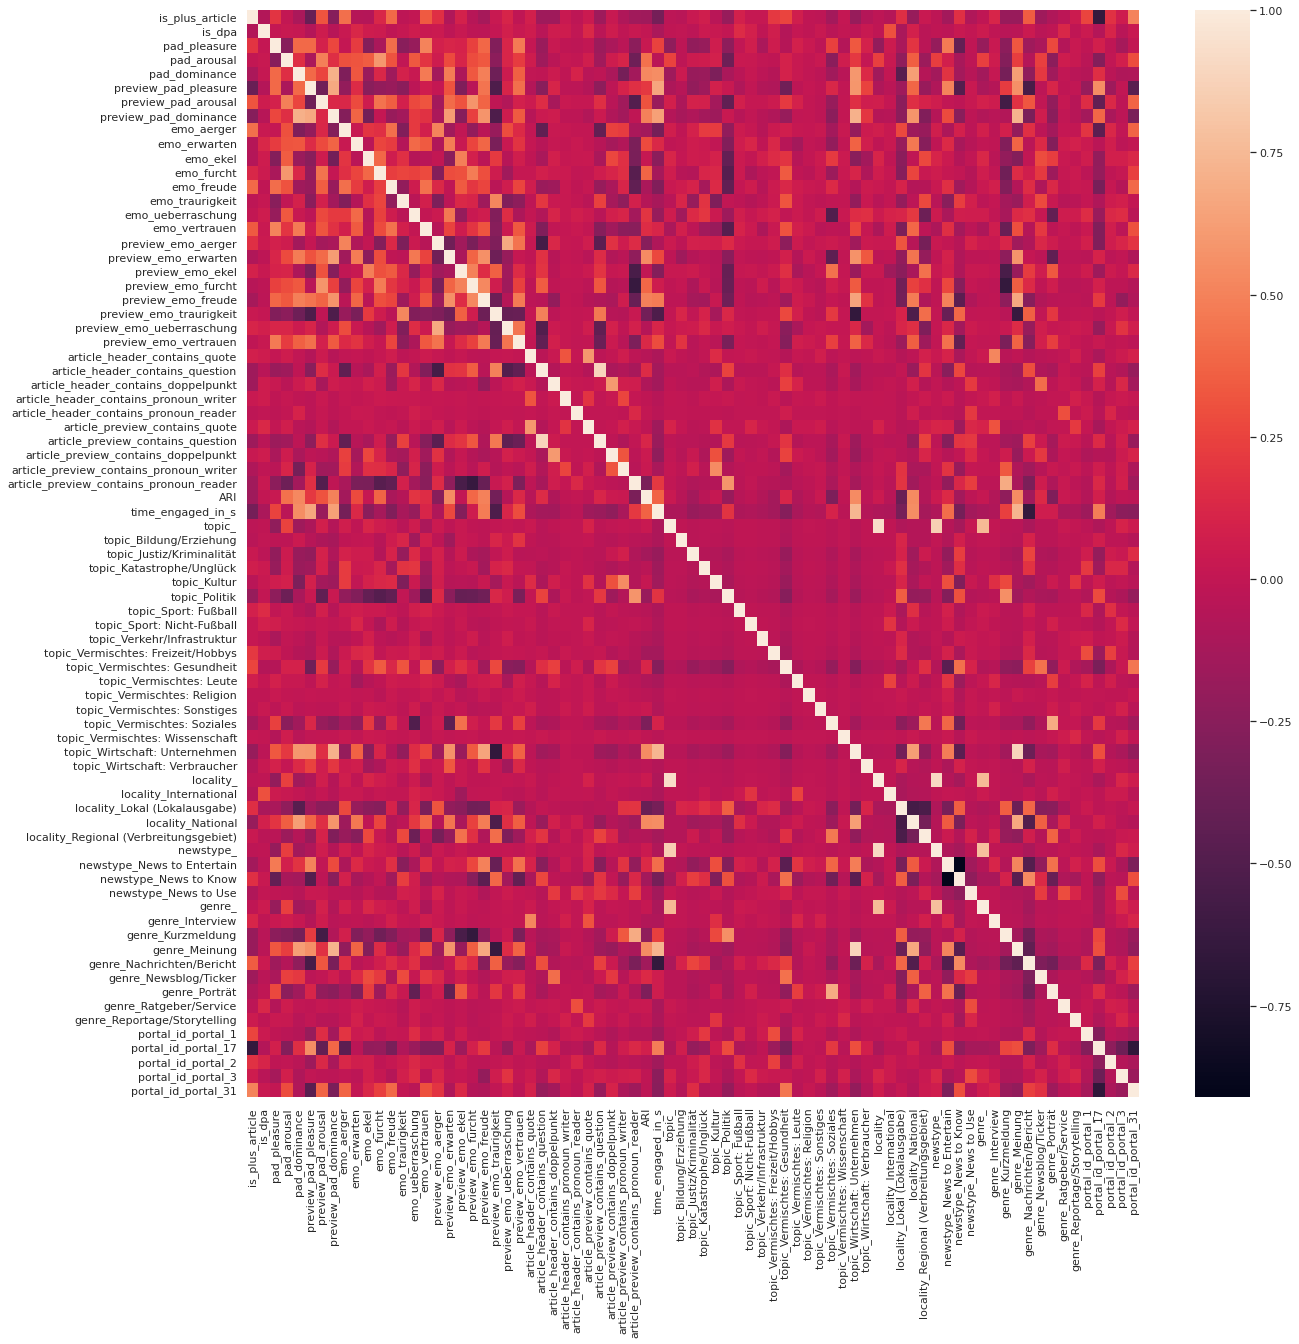

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(merged_data_cleaned.corr())

In [23]:
abs(merged_data_cleaned.corr()["time_engaged_in_s"]).sort_values(ascending=False)

time_engaged_in_s                          1.000000
topic_Wirtschaft: Unternehmen              0.732337
genre_Meinung                              0.730773
preview_pad_pleasure                       0.663421
genre_Nachrichten/Bericht                  0.646144
preview_pad_dominance                      0.629596
pad_dominance                              0.545786
locality_National                          0.545078
preview_emo_traurigkeit                    0.520972
portal_id_portal_17                        0.480000
preview_emo_freude                         0.471646
newstype_News to Entertain                 0.416132
ARI                                        0.365823
is_plus_article                            0.340176
newstype_News to Know                      0.339963
emo_aerger                                 0.337858
locality_Lokal (Lokalausgabe)              0.335221
emo_freude                                 0.287332
preview_emo_vertrauen                      0.284896
preview_emo_

In [24]:
merged_data_cleaned_no_dummies = merged_data.drop(columns=COLUMNS_TO_DROP)

features = list(filter(lambda x: x not in ["time_engaged_in_s", "article_drive_id"], merged_data_cleaned_no_dummies.columns))

In [25]:
merged_data_cleaned["time_engaged_in_s"]

0        0
1        0
2        0
3        5
4        5
        ..
17168    5
17169    5
17170    5
17171    0
17172    0
Name: time_engaged_in_s, Length: 17173, dtype: int64

In [26]:
sns.set(rc={'figure.figsize':(4,4)})


from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

merged_data_cleaned_no_dummies_no_na = merged_data_cleaned_no_dummies.dropna()

X, y = pd.get_dummies(merged_data_cleaned_no_dummies_no_na[features]), merged_data_cleaned_no_dummies_no_na["time_engaged_in_s"].array
X_train, X_test, y_train, y_test = train_test_split(X, y)




In [27]:
svm = LinearSVR()

In [28]:
svm.fit(X_train, y_train)

LinearSVR()

In [29]:
svm.score(X_test, y_test)

0.8204974294505168

In [30]:

svm.predict(X_test)

array([ 3.24998784e+03, -2.34912622e-03,  6.18500000e+03, ...,
        4.17481886e+03,  4.17481886e+03, -1.97005721e+02])

In [31]:
y_test

<PandasArray>
[3250,    0, 6185, 3250,  580, 4175, 1770, 3250,    5, 4175,
 ...
 6185,  470,    0,  580, 6185, 3250,   10, 4175, 4175,    0]
Length: 4294, dtype: int64

In [32]:
y_pred = svm.predict(X_test)

<AxesSubplot:ylabel='Count'>

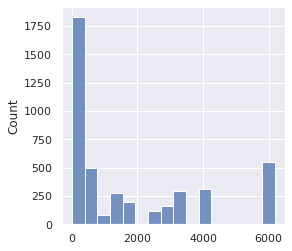

In [33]:
sns.histplot(y_test)

<AxesSubplot:ylabel='Count'>

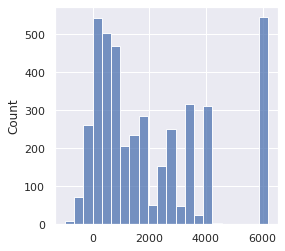

In [34]:
sns.histplot(y_pred)

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9267843289179462

In [36]:
y_pred = reg.predict(X_test)

<AxesSubplot:ylabel='Count'>

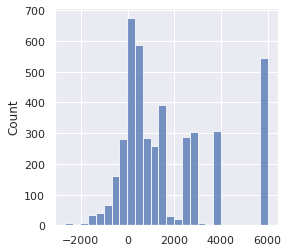

In [37]:
sns.histplot(y_pred)

0.91988821611551


/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

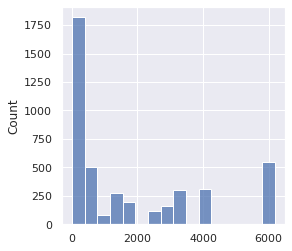

In [38]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))
y_pred = svm.predict(X_test)
sns.histplot(y_pred)

<AxesSubplot:ylabel='Count'>

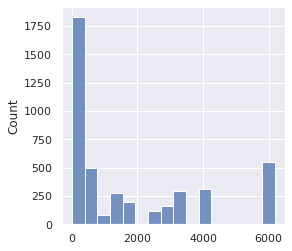

In [39]:
sns.histplot(y_test)

In [40]:
from joblib import dump, load
dump(svm, "LinearSVC.joblib")

['LinearSVC.joblib']

In [41]:
y_test

<PandasArray>
[3250,    0, 6185, 3250,  580, 4175, 1770, 3250,    5, 4175,
 ...
 6185,  470,    0,  580, 6185, 3250,   10, 4175, 4175,    0]
Length: 4294, dtype: int64

In [42]:
y_pred

array([3250,    0, 6185, ..., 4175, 4175,  205])

In [43]:
features

['is_plus_article',
 'is_dpa',
 'pad_pleasure',
 'pad_arousal',
 'pad_dominance',
 'preview_pad_pleasure',
 'preview_pad_arousal',
 'preview_pad_dominance',
 'emo_aerger',
 'emo_erwarten',
 'emo_ekel',
 'emo_furcht',
 'emo_freude',
 'emo_traurigkeit',
 'emo_ueberraschung',
 'emo_vertrauen',
 'preview_emo_aerger',
 'preview_emo_erwarten',
 'preview_emo_ekel',
 'preview_emo_furcht',
 'preview_emo_freude',
 'preview_emo_traurigkeit',
 'preview_emo_ueberraschung',
 'preview_emo_vertrauen',
 'article_header_contains_quote',
 'article_header_contains_question',
 'article_header_contains_doppelpunkt',
 'article_header_contains_pronoun_writer',
 'article_header_contains_pronoun_reader',
 'article_preview_contains_quote',
 'article_preview_contains_question',
 'article_preview_contains_doppelpunkt',
 'article_preview_contains_pronoun_writer',
 'article_preview_contains_pronoun_reader',
 'topic',
 'locality',
 'newstype',
 'genre',
 'ARI',
 'portal_id']